# **Intelligent Model for Forecasting Future Contraceptive Use**

**Project owners**

Wambui Kuria

Patrick Atak







**Project Description**

Greater access to contraceptives enables couples and individuals to determine whether, when, and how often to have children. Contraceptive access is vital to safe motherhood, healthy families, and prosperous communities.

In low- and middle-income countries (LMIC) around the world, health systems are often unable to accurately predict the quantity of contraceptives necessary for each health service delivery site, in part due to insufficient data, limited staff capacity, and inadequate systems.

When too few supplies are ordered, service delivery sites may run out, limiting access to contraceptives and family planning. When too much product is ordered, it leads to unused contraceptives that are wasted if they are left to expire.

Accurate forecasting of contraceptive consumption can save lives, money, and time by ensuring health service delivery sites have what they need when they need it and by reducing waste in the supply chain.

**Objective**:

-The goal of the Intelligent Forecasting is to predict consumption for 11 contraceptives across 156 health service delivery sites in the public sector health system in Côte d’Ivoire.

**Data**

The data source for this project can be found here: [Link](https://zindi.africa/competitions/usaids-intelligent-forecasting-challenge-model-future-contraceptive-use/data)

In [ ]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import the ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import the Deep Learning Libraries
import tensorflow.keras
import keras
from keras.models import Sequential
from keras.layers import Dense


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(f"The numpy version: {np.__version__}")
print(f"The pandas version: {pd.__version__}")
print(f"The keras version: {keras.__version__}")
print(f"The tensorflow version: {tensorflow.__version__}")

The numpy version: 1.18.5
The pandas version: 1.0.5
The keras version: 2.4.3
The tensorflow version: 2.3.0



## Reading in the dataset

In [ ]:
df = pd.read_csv("Train.csv")
df.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


## Exploring

In [ ]:
# Get te size of the dataset 
print(f"The size of the data set is: {df.size}")

The size of the data set is: 500542


In [ ]:
# Get the shape of the dataset
print(f"The shape of the data set is: {df.shape}")
print("The data has 35753 observations and 14 features.")

The shape of the data set is: (35753, 14)
The data has 35753 observations and 14 features.


In [ ]:
# Get the dimensions of the dataset
df.ndim

2

In [ ]:
# Get the column names
list(df.columns)

['year',
 'month',
 'region',
 'district',
 'site_code',
 'product_code',
 'stock_initial',
 'stock_received',
 'stock_distributed',
 'stock_adjustment',
 'stock_end',
 'average_monthly_consumption',
 'stock_stockout_days',
 'stock_ordered']

In [ ]:
# Get the column data types
df.dtypes

year                             int64
month                            int64
region                          object
district                        object
site_code                       object
product_code                    object
stock_initial                    int64
stock_received                   int64
stock_distributed                int64
stock_adjustment                 int64
stock_end                        int64
average_monthly_consumption      int64
stock_stockout_days              int64
stock_ordered                  float64
dtype: object

In [ ]:
# Get more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35753 entries, 0 to 35752
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         35753 non-null  int64  
 1   month                        35753 non-null  int64  
 2   region                       35753 non-null  object 
 3   district                     35753 non-null  object 
 4   site_code                    35753 non-null  object 
 5   product_code                 35753 non-null  object 
 6   stock_initial                35753 non-null  int64  
 7   stock_received               35753 non-null  int64  
 8   stock_distributed            35753 non-null  int64  
 9   stock_adjustment             35753 non-null  int64  
 10  stock_end                    35753 non-null  int64  
 11  average_monthly_consumption  35753 non-null  int64  
 12  stock_stockout_days          35753 non-null  int64  
 13  stock_ordered   

**--------------------------------------------------------------------**

From the info we can deduce that:

    a) There are 35753 observations in most of the columns.
    b) The column "stock_ordered" looks like it's missing some values.
    c) int64 and object are the dominant data types. 

## Cleaning

In [ ]:
# Checking for missing values
df.isnull().values.sum()

763

- There is a total of **763** missing values present within the dataset.

In [ ]:
# Checking for missing values
df.isnull().sum()

year                             0
month                            0
region                           0
district                         0
site_code                        0
product_code                     0
stock_initial                    0
stock_received                   0
stock_distributed                0
stock_adjustment                 0
stock_end                        0
average_monthly_consumption      0
stock_stockout_days              0
stock_ordered                  763
dtype: int64

The breakdown above confirms the previous suspicion about the **"stock_ordered"** column having missing values.

In [ ]:
# Filling in the missing values
#
# Since the values in this columns are of float64 data type
# I have decided to fill the missing values with the mean
# of the whole column.
df['stock_ordered'].fillna(df['stock_ordered'].mean(), inplace=True)

In [ ]:
df['stock_ordered'].mean()

26.65810231494667

In [ ]:
df['stock_ordered'].nunique()

334

In [ ]:
# Checking once more to see if we have done away with our missing values.
df.isnull().sum()

year                           0
month                          0
region                         0
district                       0
site_code                      0
product_code                   0
stock_initial                  0
stock_received                 0
stock_distributed              0
stock_adjustment               0
stock_end                      0
average_monthly_consumption    0
stock_stockout_days            0
stock_ordered                  0
dtype: int64

In [ ]:
# Looking for a number of distinct observations within the "Region" column.
print(f"The number of unique observations in the region column is: {df['region'].nunique()}")

The number of unique observations in the region column is: 20


- The presence of only 20 unique observations in the region column, allows me to potentially encode this column.

In [ ]:
df['region'].value_counts()

ABIDJAN 2                  6504
ABIDJAN 1-GRANDS PONTS     4597
AGNEBY-TIASSA-ME           2389
PORO-TCHOLOGO-BAGOUE       2319
GBOKLE-NAWA-SAN PEDRO      2266
N'ZI-IFOU-MORONOU          2132
BELIER                     1625
BOUNKANI-GONTOUGO          1593
SUD-COMOE                  1491
HAUT-SASSANDRA             1295
MARAHOUE                   1154
GOH                        1134
LOH-DJIBOUA                1096
CAVALLY-GUEMON             1089
KABADOUGOU-BAFING-FOLON    1039
HAMBOL                     1018
TONKPI                      884
WORODOUGOU-BERE             792
GBEKE                       757
INDENIE-DJUABLIN            579
Name: region, dtype: int64

In [ ]:
# Looking for a number of distinct observations within the "District" column.
print(f"The number of unique observations in the district column is: {df['district'].nunique()}")

The number of unique observations in the district column is: 80


In [ ]:
df['district'].value_counts()

KOUMASSI-PORT BOUET-VRIDI    2315
COCODY-BINGERVILLE           2016
ADJAME-PLATEAU-ATTECOUBE     1616
YOPOUGON-OUEST-SONGON        1366
ABOBO-EST                    1298
                             ... 
MAN                           135
MINIGNAN                      121
AGNIBILEKROU                  121
NASSIAN                       114
BANGOLO                        90
Name: district, Length: 80, dtype: int64

In [ ]:
# Looking for a number of distinct observations within the "Site Code" column.
print(f"The number of unique observations in the site code column is: {df['site_code'].nunique()}")

The number of unique observations in the site code column is: 155


In [ ]:
df['site_code'].value_counts()

C1015    416
C1087    413
C1030    405
C1055    404
C1112    398
        ... 
C3043     47
C2194     44
C1745     43
C1094     30
C1701     16
Name: site_code, Length: 155, dtype: int64

In [ ]:
# Looking for a number of distinct observations within the "Product Code" column.
print(f"The number of unique observations in the product code column is: {df['product_code'].nunique()}")

The number of unique observations in the product code column is: 11


In [ ]:
df['product_code'].value_counts()

AS27133    5368
AS27000    5259
AS27134    4708
AS27137    4449
AS27132    4436
AS27138    4060
AS27139    2347
AS46000    1981
AS42018    1550
AS17005    1248
AS21126     347
Name: product_code, dtype: int64

From the data after getting the number of unique observations within each column that had **"object"** as it's data type. I came to this conclusion:
    
    a) The region column has a total of 20 unique observations, meaning that I can potentially encode this column.
    b) The product code seemed to has the smallest number of unique observations, thus allowing it to be encoded easily.
    c) The site code and district columns had too many unique observations so I think I'll drop them.

In [ ]:
# Checking for statistical information
df.describe()

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
count,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.0,35753.000000
mean,2017.433782,6.169412,63.245518,14.846055,14.764327,0.961150,64.288395,14.606439,0.0,26.658102
std,1.019933,3.429079,168.661538,70.631782,39.848242,37.883099,170.848479,32.521384,0.0,106.016374
min,2016.000000,1.000000,0.000000,0.000000,0.000000,-1440.000000,0.000000,0.000000,0.0,0.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,2017.000000,6.000000,12.000000,0.000000,1.000000,0.000000,13.000000,3.000000,0.0,0.000000
75%,2018.000000,9.000000,69.000000,0.000000,13.000000,0.000000,70.000000,16.000000,0.0,20.000000
max,2019.000000,12.000000,4320.000000,3534.000000,1728.000000,3003.000000,4320.000000,864.000000,0.0,10240.000000


In [ ]:
# Check for outliers in the dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

In [ ]:
# Finding the Upper Bound and the Lower Bound
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR)

print("Lower bound values")
print("\n")
print(lower_bound)

print("\n")
print("===============")
print("===============")
print("\n")

print("Upper bound values")
print("\n")
print(upper_bound)

Lower bound values


year                           2015.5
month                            -6.0
stock_initial                  -103.5
stock_received                    0.0
stock_distributed               -19.5
stock_adjustment                  0.0
stock_end                      -105.0
average_monthly_consumption     -24.0
stock_stockout_days               0.0
stock_ordered                   -30.0
dtype: float64




Upper bound values


year                           2019.5
month                            18.0
stock_initial                   172.5
stock_received                    0.0
stock_distributed                32.5
stock_adjustment                  0.0
stock_end                       175.0
average_monthly_consumption      40.0
stock_stockout_days               0.0
stock_ordered                    50.0
dtype: float64


In [ ]:
# Presenting the outliers
df[((df <  lower_bound) |(df > upper_bound)).any(axis=1)]

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
5,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27133,50,50,19,0,81,6,0,0.0
7,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4023,AS27133,150,0,29,0,121,51,0,0.0
8,2019,2,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,0,0,0,0,0,18,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35743,2016,10,LOH-DJIBOUA,GUITRY,C2055,AS27134,0,100,9,0,91,3,0,0.0
35746,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27139,0,0,0,0,0,0,0,100.0
35747,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27000,18,10,15,0,13,16,0,10.0
35748,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27133,0,50,25,0,25,8,0,25.0


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)
print(df.shape)

(21519, 14)
(35753, 14)


In [ ]:
#pip install datacleaner
#from datacleaner import autoclean

In [ ]:
#my_data = pd.read_csv('Train.csv', sep=',')
#my_clean_data = autoclean(my_data)
#my_data.to_csv('my_clean_data.csv', sep=',', index=False)

In [ ]:
mcc = pd.read_csv('my_clean_data.csv')
mcc.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,11,0,119,5,75,0,21,-54,0,18,0,100.0
1,2019,1,11,0,119,3,3,0,3,0,0,2,0,10.0
2,2019,1,11,0,119,2,0,75,22,0,53,9,0,0.0
3,2019,1,11,0,119,6,2,0,0,0,2,0,0,0.0
4,2019,1,11,0,119,7,45,0,2,0,43,1,0,0.0


In [ ]:
mcc.tail()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
35748,2016,7,13,40,83,4,0,50,25,0,25,8,0,25.0
35749,2016,7,13,40,83,7,150,0,0,0,150,0,0,0.0
35750,2016,7,13,40,83,3,1,10,4,0,7,13,0,0.0
35751,2016,7,13,40,83,5,8,0,8,0,0,10,0,0.0
35752,2016,7,13,40,83,0,48,0,2,0,46,1,0,0.0


In [ ]:
# Check for outliers in the dataset
Q1 = mcc.quantile(0.25)
Q3 = mcc.quantile(0.75)

IQR = Q3 - Q1

In [ ]:
mcc_new = mcc[~((mcc < (Q1 - 1.5 * IQR)) |(mcc > (Q3 + 1.5 * IQR))).any(axis=1)]
print(mcc_new.shape)
print(mcc.shape)

(21519, 14)
(35753, 14)


In [ ]:
list(mcc.columns)


['year',
 'month',
 'region',
 'district',
 'site_code',
 'product_code',
 'stock_initial',
 'stock_received',
 'stock_distributed',
 'stock_adjustment',
 'stock_end',
 'average_monthly_consumption',
 'stock_stockout_days',
 'stock_ordered']

## EDA

### Univariate Analysis

In [ ]:
list(df.columns)

['year',
 'month',
 'region',
 'district',
 'site_code',
 'product_code',
 'stock_initial',
 'stock_received',
 'stock_distributed',
 'stock_adjustment',
 'stock_end',
 'average_monthly_consumption',
 'stock_stockout_days',
 'stock_ordered']

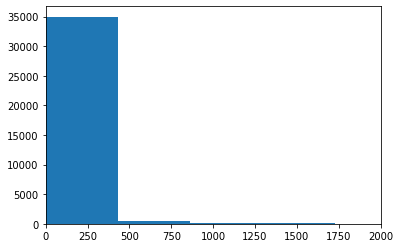

In [ ]:
plt.hist(df['stock_initial'])
plt.xlim(0, 2000);

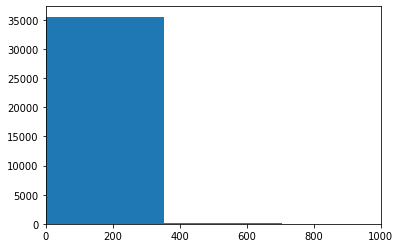

In [ ]:
plt.hist(df['stock_received'])
plt.xlim(0, 1000);

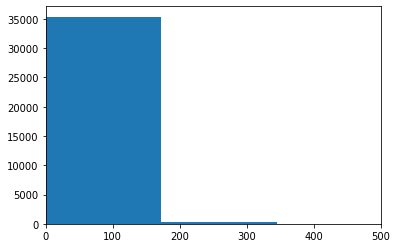

In [ ]:
plt.hist(df['stock_distributed'])
plt.xlim(0, 500);

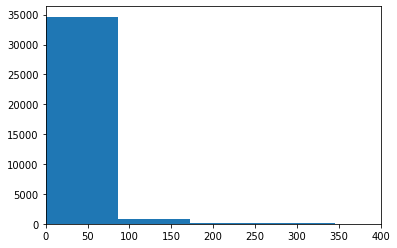

In [ ]:
plt.hist(df['average_monthly_consumption'])
plt.xlim(0, 400);

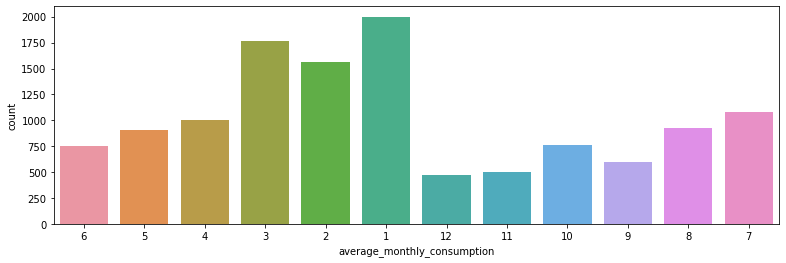

In [ ]:
plt.figure(figsize=(13, 4))
sns.countplot(df['average_monthly_consumption'], order = df['month'].value_counts().index);

The count plot above show how much contraceptives are used per month and which on which month does the highest consumption occur in: 

    a. January - 2000.
    b. March - 1750.
    c. February - 1500.

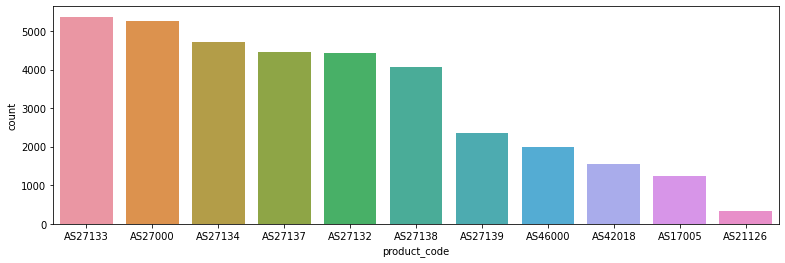

In [ ]:
plt.figure(figsize=(13, 4))
sns.countplot(df['product_code'], order = df['product_code'].value_counts().index);

The product plot shows which product is most widely in use:

    a. AS27133.
    b. AS27000.
    c. AS27134.

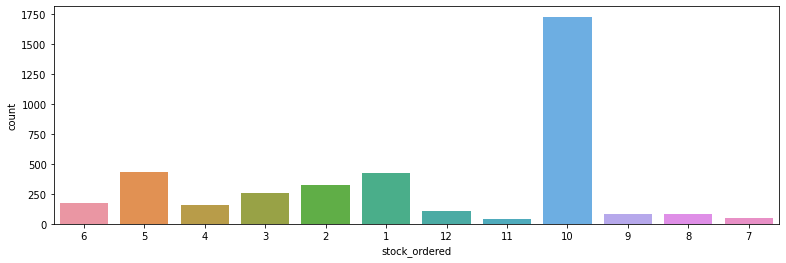

In [ ]:
plt.figure(figsize=(13, 4))
sns.countplot(df['stock_ordered'], order = df['month'].value_counts().index);

From the plot above we can see that the month of October leads in the number of contraceptives ordered followed by May and January respectively.

In [ ]:
col_names = ['stock_initial','stock_distributed', 'stock_adjustment', 'average_monthly_consumption', 'stock_ordered', 'stock_received']

In [ ]:
fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):
    
    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

plt.show()

### Bivariate Analysis

In [ ]:
# I'll do new EDA here. 
# Pandas Profiler for df data
#profile = ProfileReport(df_p, title='Exploratory Report', explorative=True)

In [ ]:
#profile

In [ ]:
print(list(df.columns))
print("--------------------------------")
#print(list(df_p.columns))

['year', 'month', 'region', 'district', 'site_code', 'product_code', 'stock_initial', 'stock_received', 'stock_distributed', 'stock_adjustment', 'stock_end', 'average_monthly_consumption', 'stock_stockout_days', 'stock_ordered']
--------------------------------


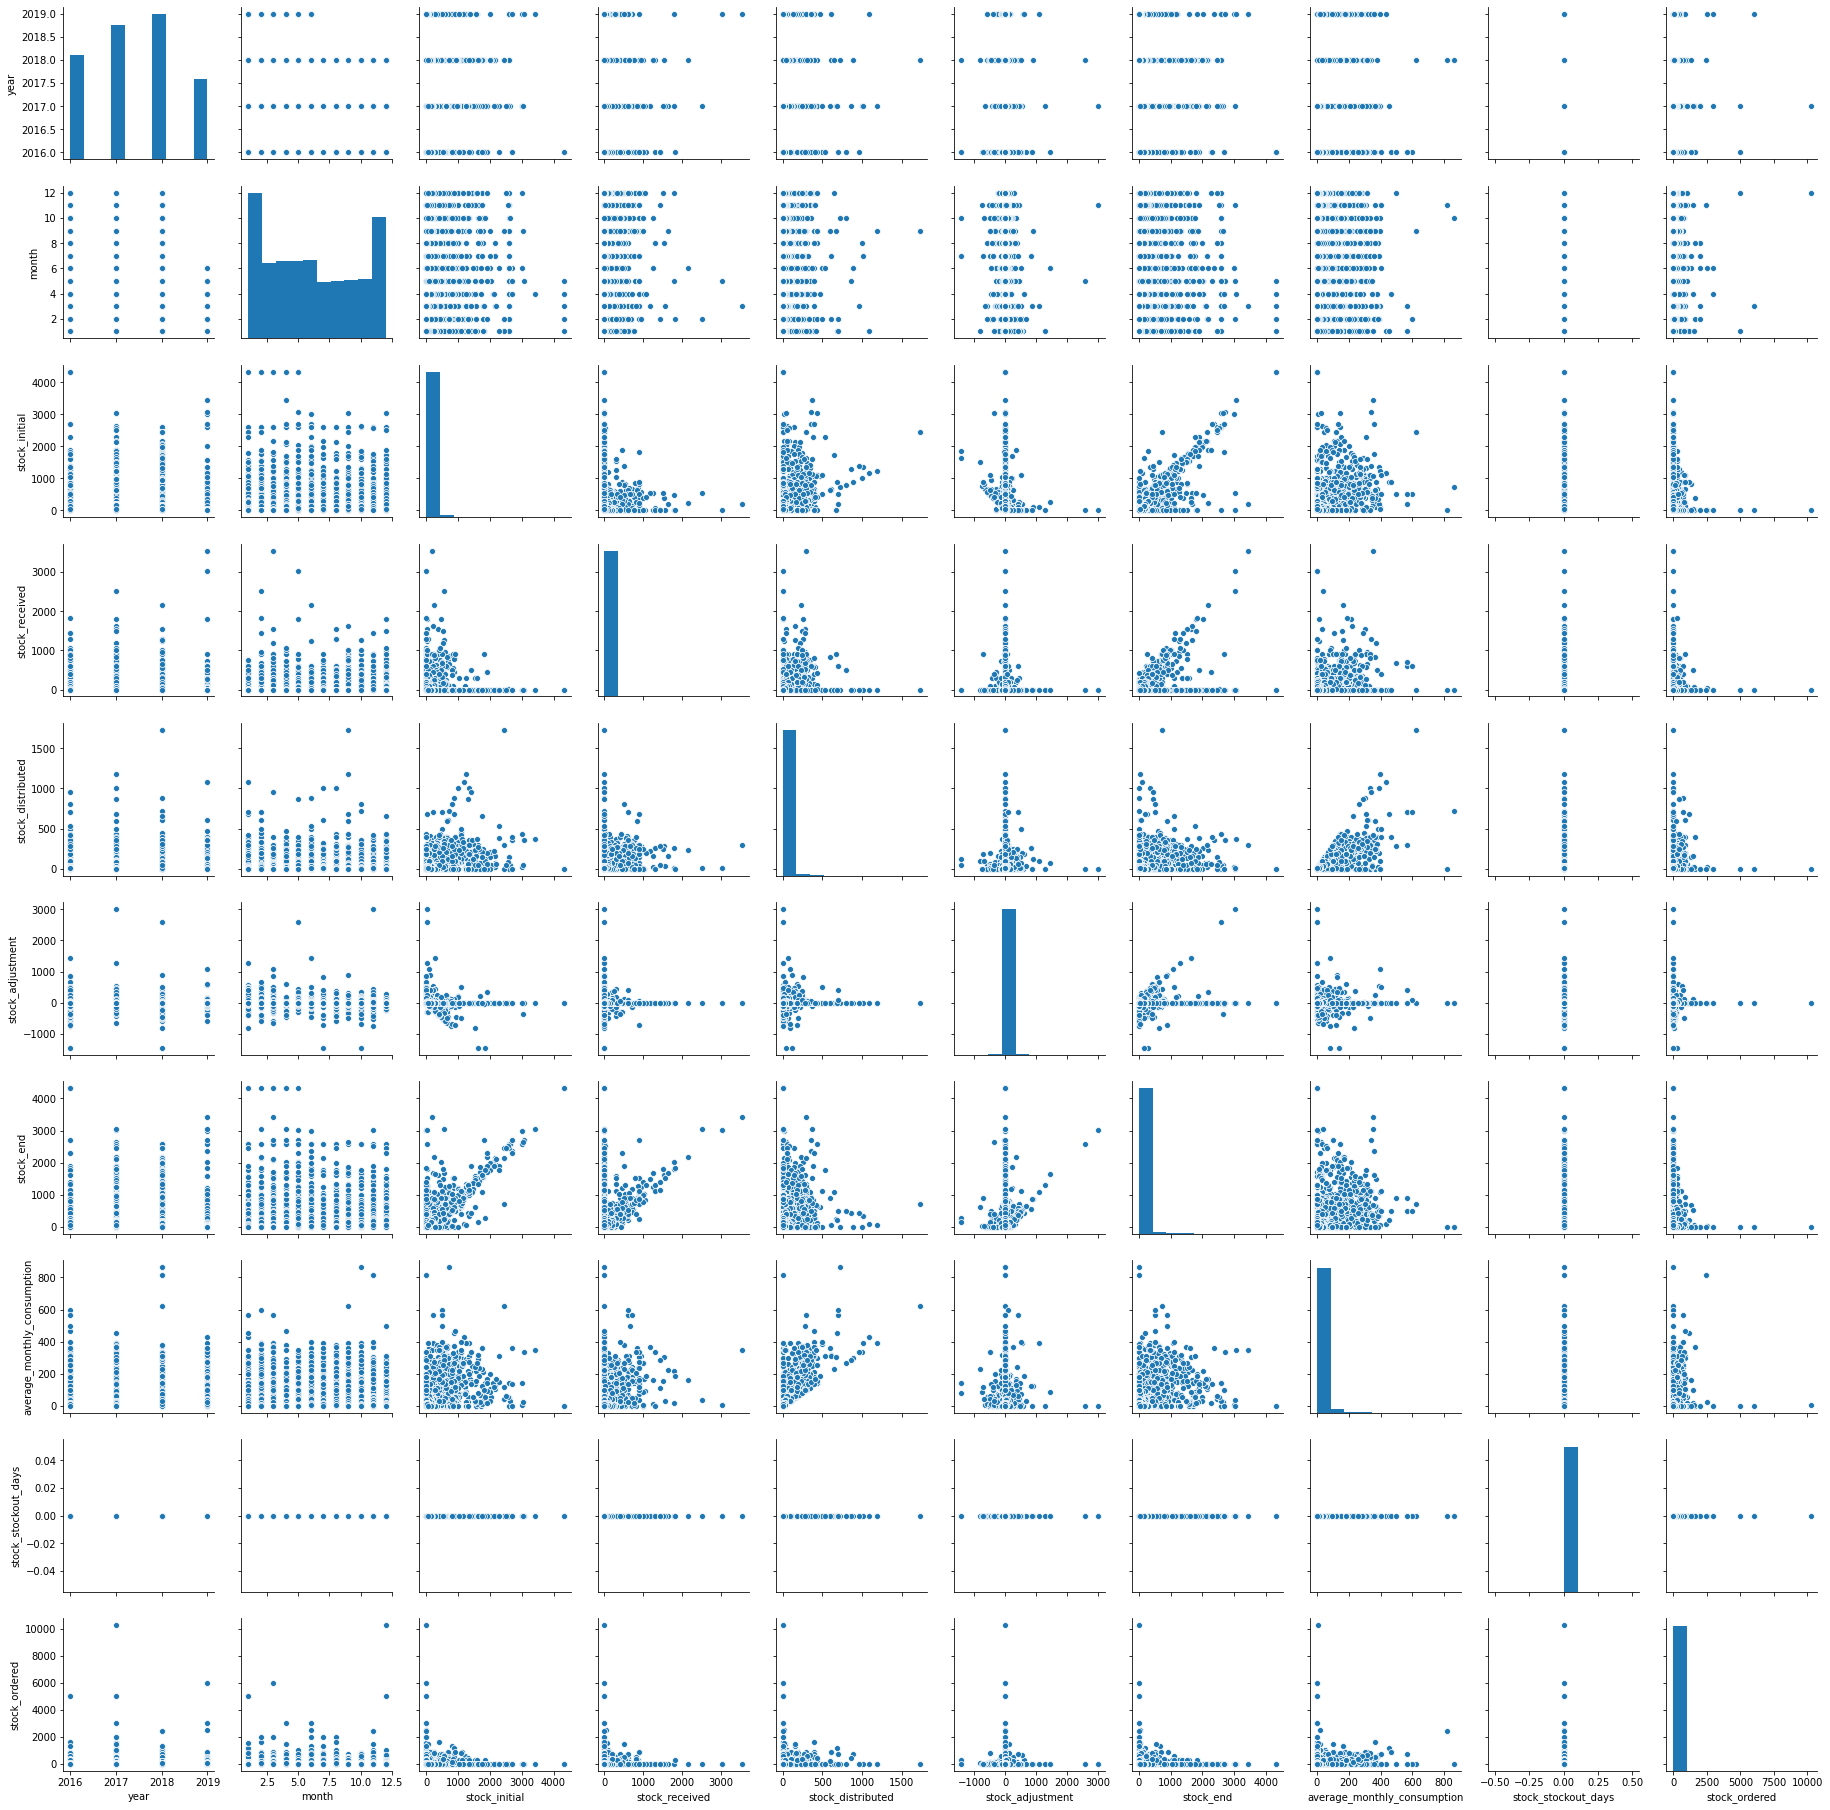

In [ ]:
sns.pairplot(df);

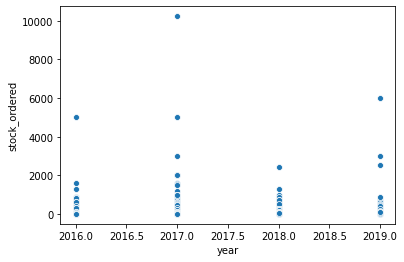

In [ ]:
# A relationship between the 4 years and the amount of stock ordered
sns.scatterplot(x = df['year'], y = df['stock_ordered']);

The scatterplot shows which year(s) recorded the highest in order of contraceptives.

    a. 2017.
    b. 2019.
    c. 2016. 
    d. 2018.

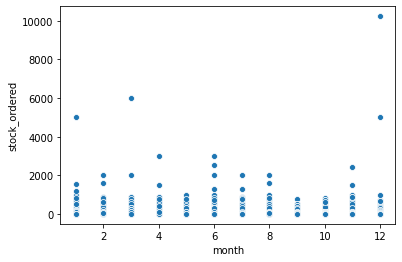

In [ ]:
# A relationship between the month and the amount of stock ordered
sns.scatterplot(x = df['month'], y = df['stock_ordered']);

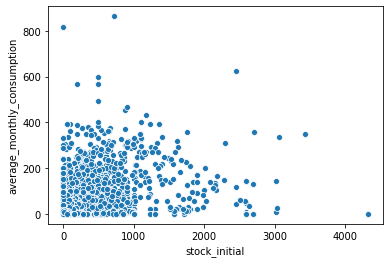

In [ ]:
# Stock Initial vs Average Monthly Consumption
sns.scatterplot(x = df['stock_initial'], y = df['average_monthly_consumption']);

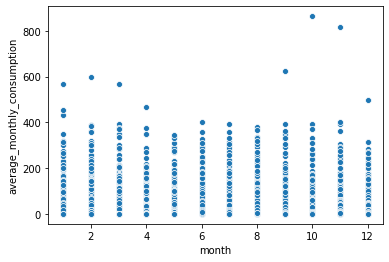

In [ ]:
# Month vs Average Monthly Consuption
sns.scatterplot(x = df['month'], y = df['average_monthly_consumption']);

In [ ]:
# drop the stock_stockout_days in order to avoid invalid coefficient & for the corr plot
dff = df.copy()
dff.drop('stock_stockout_days', axis=1, inplace = True)
dff.head();

In [ ]:
 dff.corr()

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered
year,1.000000,-0.276131,-0.001140,-0.006544,0.003759,-0.022262,-0.009644,0.003347,-0.011806
month,-0.276131,1.000000,0.004930,0.022815,0.002826,-0.020279,0.009143,-0.000352,-0.007061
stock_initial,-0.001140,0.004930,1.000000,0.049173,0.418962,-0.075545,0.893060,0.422146,0.023625
stock_received,-0.006544,0.022815,0.049173,1.000000,0.295552,-0.008208,0.391208,0.351547,0.041978
stock_distributed,0.003759,0.002826,0.418962,0.295552,1.000000,0.045175,0.312565,0.810097,0.216456
stock_adjustment,-0.022262,-0.020279,-0.075545,-0.008208,0.045175,1.000000,0.133227,0.037556,0.001461
stock_end,-0.009644,0.009143,0.893060,0.391208,0.312565,0.133227,1.000000,0.381461,-0.009484
average_monthly_consumption,0.003347,-0.000352,0.422146,0.351547,0.810097,0.037556,0.381461,1.000000,0.261329
stock_ordered,-0.011806,-0.007061,0.023625,0.041978,0.216456,0.001461,-0.009484,0.261329,1.000000


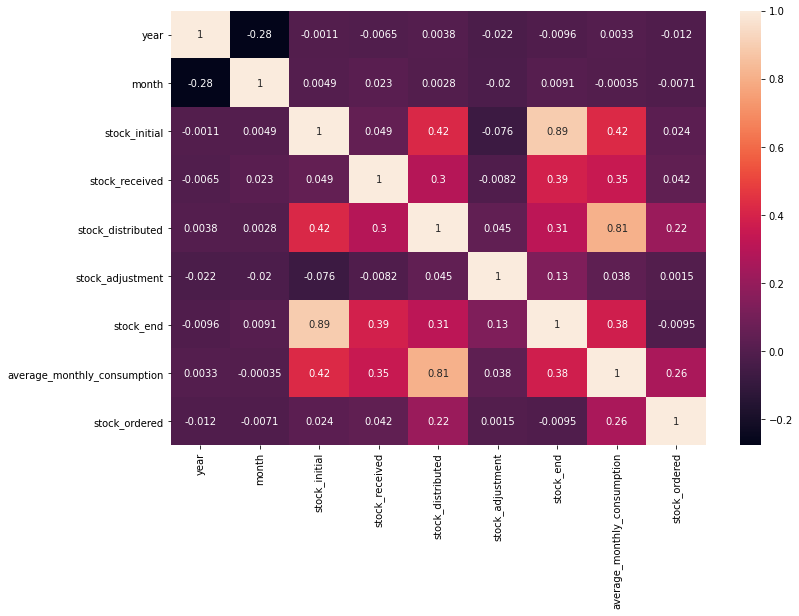

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
corr = dff.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True);

Above you can see the correlation network of all the variables selected, correlation value lies between -1 to +1. Highly correlated variables will have correlation value close to +1 and less correlated variables will have correlation value close to -1.

### Detecting Multicolinearity

In [ ]:
# Check for Multicolliniearity
# Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.
# Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual 
# effects of the independent variables on the dependent variable.

In [ ]:
# First, let's understand how our independent variables are correlated to each other
corr = dff.corr()
corr

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered
year,1.000000,-0.276131,-0.001140,-0.006544,0.003759,-0.022262,-0.009644,0.003347,-0.011806
month,-0.276131,1.000000,0.004930,0.022815,0.002826,-0.020279,0.009143,-0.000352,-0.007061
stock_initial,-0.001140,0.004930,1.000000,0.049173,0.418962,-0.075545,0.893060,0.422146,0.023625
stock_received,-0.006544,0.022815,0.049173,1.000000,0.295552,-0.008208,0.391208,0.351547,0.041978
stock_distributed,0.003759,0.002826,0.418962,0.295552,1.000000,0.045175,0.312565,0.810097,0.216456
stock_adjustment,-0.022262,-0.020279,-0.075545,-0.008208,0.045175,1.000000,0.133227,0.037556,0.001461
stock_end,-0.009644,0.009143,0.893060,0.391208,0.312565,0.133227,1.000000,0.381461,-0.009484
average_monthly_consumption,0.003347,-0.000352,0.422146,0.351547,0.810097,0.037556,0.381461,1.000000,0.261329
stock_ordered,-0.011806,-0.007061,0.023625,0.041978,0.216456,0.001461,-0.009484,0.261329,1.000000


The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the *inverse* of the matrix above.

In [ ]:
# Computing the VIF

# VIF determines the strength of the correlation between the independent variables.
# It is predicted by taking a variable and regressing it against every other variable. 
# VIF score of an independent variable represents how well the variable is explained by other independent variables.

pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered
year,1.083837,0.299929,9.831571e-03,5.177321e-03,-9.988359e-03,3.186712e-02,-1.429569e-03,-0.006847,0.018355
month,0.299929,1.084082,1.097640e-02,-1.863468e-02,-1.394452e-02,3.137079e-02,-1.465584e-02,0.014169,0.010849
stock_initial,0.009829,0.010977,-2.215568e+12,-9.278319e+11,5.234537e+11,-4.976392e+11,2.244297e+12,-0.160897,0.105624
stock_received,0.005176,-0.018635,-9.278319e+11,-3.885558e+11,2.192110e+11,-2.084005e+11,9.398626e+11,-0.340108,0.067143
stock_distributed,-0.009988,-0.013945,5.234537e+11,2.192110e+11,-1.236720e+11,1.175730e+11,-5.302410e+11,-2.303101,-0.042054
stock_adjustment,0.031868,0.031371,-4.976392e+11,-2.084005e+11,1.175730e+11,-1.117748e+11,5.040919e+11,0.000240,0.018341
stock_end,-0.001430,-0.014655,2.244297e+12,9.398626e+11,-5.302410e+11,5.040919e+11,-2.273397e+12,-0.239120,0.026378
average_monthly_consumption,-0.006847,0.014169,-1.608917e-01,-3.401058e-01,-2.303102e+00,2.412734e-04,-2.391255e-01,3.230673,-0.329919
stock_ordered,0.018355,0.010849,1.056068e-01,6.713559e-02,-4.204964e-02,1.833746e-02,2.639527e-02,-0.329919,1.090523


## Modelling Our Data

In [ ]:
# Splitting the data into X matrix of features and y vector variable
# X matrix of features
# y vector of variables
X = mcc.drop(['year', 'month','stock_distributed'], axis = 1)
y = mcc['stock_distributed']


In [ ]:
X

,region,district,site_code,product_code,stock_initial,stock_received,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,11,0,119,5,75,0,-54,0,18,0,100.0
1,11,0,119,3,3,0,0,0,2,0,10.0
2,11,0,119,2,0,75,0,53,9,0,0.0
3,11,0,119,6,2,0,0,2,0,0,0.0
4,11,0,119,7,45,0,0,43,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35748,13,40,83,4,0,50,0,25,8,0,25.0
35749,13,40,83,7,150,0,0,150,0,0,0.0
35750,13,40,83,3,1,10,0,7,13,0,0.0
35751,13,40,83,5,8,0,0,0,10,0,0.0


In [ ]:
y

0        21
1         3
2        22
3         0
4         2
         ..
35748    25
35749     0
35750     4
35751     8
35752     2
Name: stock_distributed, Length: 35753, dtype: int64

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [ ]:
# Feature Scaling on the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now that I've got my data split into train and test sets. It's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

    1. Multiple Linear Regressor
    2. Support Vector Regressor
    3. Decision Tree Regressor
    4. Random Forest Regressor

In [ ]:
linReg = LinearRegression()
svr = SVR(gamma='scale')
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)

### Residual plots and Heteroskedasticity Testing

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, y_test)

# Let's describe our residual:
print(pd.DataFrame(residuals).describe())
print()
print(residuals.mean())

       stock_distributed
count       1.072600e+04
mean       -9.703221e-16
std         1.837913e-13
min        -3.865352e-12
25%        -3.907985e-14
50%        -1.421085e-14
75%         1.421085e-14
max         7.942091e-12

-9.703220885741252e-16




Let's show the residual plot

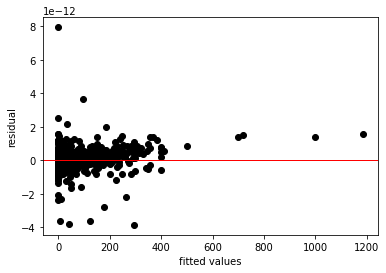

In [ ]:
plt.scatter(admit_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: most of our residuals are centered around the mean at 0. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use [bartlett's test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm). The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
#print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
    print('the variances are unequal, and the model should be reassessed')
else:
    print('the variances are homogeneous!')



the variances are homogeneous!


In [ ]:
linReg.fit(X_train, y_train)
svr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(),
          "SVR": SVR(gamma = 'scale'),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(n_estimators = 100)}

# Create a function to fit and score models
def fit_and_mse(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dictionary of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Predict the X_test
        y_preds = model.predict(X_test)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = np.sqrt(mean_squared_error(y_test, y_preds)) #model.score(X_test, y_test)
    return model_scores

In [ ]:
# Baseline MSE & RMSE
model_scores = fit_and_mse(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Decision Tree': 23.85772086089715,
 'Linear Regression': 1.8378529423965033e-13,
 'Random Forest': 16.932045241770535,
 'SVR': 30.748763153516588}

## Model Comparison

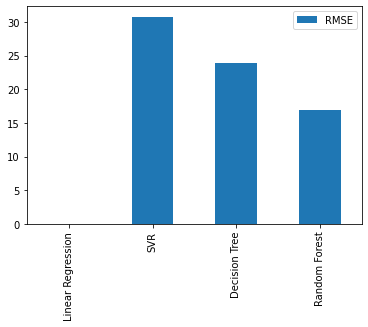

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["RMSE"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

    * Hypyterparameter tuning
    * MSE
    * RMSE
    * Cross Validation

## Cross Validation & Scores

In [ ]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [ ]:
# getting the cross validation of my models using the default R^2 scoring parameter
lin_cross = cross_val_score(linReg, X, y, cv=5)
svr_cross = cross_val_score(svr, X, y, cv = 5)
dtr_cross = cross_val_score(dtr, X, y, cv=5)
rfr_cross = cross_val_score(rfr, X, y, cv=5)


# print the scores
print(f"The R^2 value for our Linear Regressor is: {np.mean(lin_cross)}.")
print(f"The R^2 value for our Support Vector Regressor is: {np.mean(svr_cross)}.")
print(f"The R^2 value for our Decision Tress Regressor is: {np.mean(dtr_cross)}.")
print(f"The R^2 value for our Random Forest Regressor is: {np.mean(rfr_cross)}.")

The R^2 value for our Linear Regressor is: 1.0.
The R^2 value for our Support Vector Regressor is: 0.5121691944864646.
The R^2 value for our Decision Tress Regressor is: 0.5658553679300686.
The R^2 value for our Random Forest Regressor is: 0.7995370399547715.


In [ ]:
from sklearn.metrics import mean_squared_error

# Baseline Models
# get the various y-preds
y_lin_pred = linReg.predict(X_test)
y_svr_pred = svr.predict(X_test)
y_dtr_pred = dtr.predict(X_test)
y_rfr_pred = rfr.predict(X_test)


# get the MSE
lin_mse = mean_squared_error(y_test, y_lin_pred)
svr_mse = mean_squared_error(y_test, y_svr_pred)
dtr_mse = mean_squared_error(y_test, y_dtr_pred)
rfr_mse = mean_squared_error(y_test, y_rfr_pred)



# print the MSE scores
print("The MSE scores are:")
print()
print(f"The MSE value for our Linear Regressor is: {lin_mse}.")
print(f"The MSE value for our Support Vector Regressor is: {svr_mse}.")
print(f"The MSE value for our Decision Tress Regressor is: {dtr_mse}.")
print(f"The MSE value for our Random Forest Regressor is: {rfr_mse}.")

print()
print()


# print the RMSE scores
print("The RMSE scores are:")
print()
print(f"The RMSE value for our Linear Regressor is: {np.sqrt(lin_mse)}.")
print(f"The RMSE value for our Support Vector Regressor is: {np.sqrt(svr_mse)}.")
print(f"The RMSE value for our Decision Tress Regressor is: {np.sqrt(dtr_mse)}.")
print(f"The RMSE value for our Random Forest Regressor is: {np.sqrt(rfr_mse)}.")


The MSE scores are:

The MSE value for our Linear Regressor is: 3.3777034378754846e-26.
The MSE value for our Support Vector Regressor is: 945.4864354710594.
The MSE value for our Decision Tress Regressor is: 548.0549132947976.
The MSE value for our Random Forest Regressor is: 275.0469478090621.


The RMSE scores are:

The RMSE value for our Linear Regressor is: 1.8378529423965033e-13.
The RMSE value for our Support Vector Regressor is: 30.748763153516588.
The RMSE value for our Decision Tress Regressor is: 23.410572681905876.
The RMSE value for our Random Forest Regressor is: 16.584539421071124.


In [ ]:
# Differences
lin_diff = y_test - y_lin_pred
svr_diff = y_test - y_svr_pred 
dtr_diff = y_test - y_dtr_pred 
rfr_diff = y_test - y_rfr_pred 

# Baseline Predictions DataFrame
lin_df = pd.DataFrame({"Actual": y_test, "Predicted":y_lin_pred, "Difference":lin_diff})
svr_df = pd.DataFrame({"Actual": y_test, "Predicted":y_svr_pred, "Difference":svr_diff})
dtr_df = pd.DataFrame({"Actual": y_test, "Predicted":y_dtr_pred, "Difference":dtr_diff})
rfr_df = pd.DataFrame({"Actual": y_test, "Predicted":y_rfr_pred, "Difference":rfr_diff})

print("Linear Prediction")
print(lin_df.head())
print()

print("==========")
print("SVR Prediction")
print(svr_df.head())
print()

print("==========")
print("Decision Tree Prediction")
print(dtr_df.head())
print()

print("==========")
print("Random Forest Prediction")
print(rfr_df.head())

Linear Prediction
       Actual     Predicted    Difference
34569      24  2.400000e+01  2.842171e-14
28945       0 -4.973799e-14  4.973799e-14
7893       42  4.200000e+01 -1.207923e-13
6056        9  9.000000e+00 -7.460699e-14
24382      16  1.600000e+01 -3.019807e-13

SVR Prediction
       Actual  Predicted  Difference
34569      24  19.874399    4.125601
28945       0  -0.069256    0.069256
7893       42  37.041233    4.958767
6056        9  10.345398   -1.345398
24382      16  16.897777   -0.897777

Decision Tree Prediction
       Actual  Predicted  Difference
34569      24       30.0        -6.0
28945       0        0.0         0.0
7893       42       34.0         8.0
6056        9       19.0       -10.0
24382      16       15.0         1.0

Random Forest Prediction
       Actual  Predicted  Difference
34569      24      29.12       -5.12
28945       0       0.00        0.00
7893       42      40.11        1.89
6056        9      12.97       -3.97
24382      16      24.17       -8

## Adaptive Boosting

In [ ]:
# Performing ADA Boosting on our Decision Tree Regressor

# Create a decision tree classifier, we will set its max_depth to 4
# ----------
# 

from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=21,min_samples_split=3),
                          n_estimators=900, random_state=42)

# Train it on our training set.
ada_boost = ada_boost.fit(X_train, y_train)

# Predict based on the model we've trained.
y_pred_ada = ada_boost.predict(X_test)


# Evaluation metrics
pred_metric = mean_squared_error(y_test, y_pred_ada)


# R^2 score for ADA Boost on test set
print(f"The score value for our ADA Boost is: {ada_boost.score(X_test, y_test)}.")


print(f"The MSE value for our ADA Boost is: {pred_metric}.")
print(f"The RMSE value for our ADA Boost is: {np.sqrt(pred_metric)}.")

The score value for our ADA Boost is: 0.8459223317746383.
The MSE value for our ADA Boost is: 238.77523133549312.
The RMSE value for our ADA Boost is: 15.452353585635203.


In [ ]:
# Prediction DataFrame
differences =  y_test - y_pred_ada 
ada_dtr = pd.DataFrame({"Actual": y_test, "Prediction":y_pred_ada, "Differences":differences})
ada_dtr.head()

,Actual,Prediction,Differences
34569,24,31.000000,-7.000000
28945,0,0.000000,0.000000
7893,42,41.483871,0.516129
6056,9,12.455357,-3.455357
24382,16,17.000000,-1.000000


## Feature Importance

Feature ranking:
1. feature 8 (0.689816)
2. feature 4 (0.118206)
3. feature 7 (0.075730)
4. feature 5 (0.026884)
5. feature 3 (0.019469)
6. feature 10 (0.017944)
7. feature 2 (0.017135)
8. feature 1 (0.013830)
9. feature 6 (0.012286)
10. feature 0 (0.008699)
11. feature 9 (0.000000)


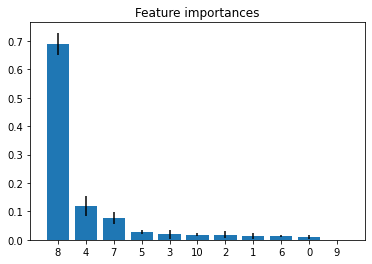

In [ ]:
# Feature importances for Random Forest Regressor
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Hyper Parameter Tuning

### Support Vector Regressor

In [ ]:
# HP parameters of the Support Vector Regressor
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
params = {
    'kernel':['linear', 'rbf'],
    'gamma':[0.5, 0.1, 0.01],
    'C':[1.0, 10.0, 100.0]
}


In [ ]:
# Step 2: Instantiating GridSearchCV object for SVR
# ---
# 
random_svr = GridSearchCV(svr, params, cv = 2, n_jobs = 1) 

In [ ]:
# Step 3: Calling the fit method
# ---
#
random_svr.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid={'C': [1.0, 10.0, 100.0], 'gamma': [0.5, 0.1, 0.01],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Step 4: Checking the parameters that return the highest accuracy
# ---
#
best_param_svr = random_svr.best_params_
print(best_param_svr)

{'C': 100.0, 'gamma': 0.5, 'kernel': 'linear'}


In [ ]:
# Finding the obtained accuracy
# --
# 
best_result_svr = random_svr.best_score_
print(best_result_svr)

# Compare this with the 

0.9999991679784052


In [ ]:
# Using SVR using the new parameters
svr_hype = SVR(gamma=0.5, C=100.0, kernel='linear')

# Fit the model
svr_hype.fit(X_train, y_train)

# Get the predictions
y_svr_hype_pred = svr_hype.predict(X_test)

# Get the score (Default R^2) on test set
svr_hype.score(X_test, y_test)

# Get the performance metric (MSE / RMSE)
#------
# Evaluation metrics
svr_hype_metric = mean_squared_error(y_test, y_svr_hype_pred)


print(f"The MSE value for our Hypertuned SVR is: {svr_hype_metric}.")
print(f"The RMSE value for our Hypertuned SVR is: {np.sqrt(svr_hype_metric)}.")


The MSE value for our Hypertuned SVR is: 0.0003235474684095198.
The RMSE value for our Hypertuned SVR is: 0.017987425285724463.


In [ ]:
# Prediction DataFrame
differences =  y_test - y_svr_hype_pred 
svr_hype_df = pd.DataFrame({"Actual": y_test, "Prediction":y_svr_hype_pred, "Differences":differences})
svr_hype_df.head()

,Actual,Prediction,Differences
34569,24,24.031062,-0.031062
28945,0,-0.016748,0.016748
7893,42,42.007554,-0.007554
6056,9,9.004409,-0.004409
24382,16,15.989412,0.010588


### Random Forest Regressor

In [ ]:
# HP parameter of the Random Forest Regressor
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    "max_depth":[1,10,100],
    "min_samples_split": [0.1, 0.5, 1.0],
}

In [ ]:
# Step 2: Instantiating GridSearchCV object 
# ---
# 

random_rfr = GridSearchCV(estimator=rfr,
                     param_grid=grid_param,
                     cv=2,
                     n_jobs=1)

In [ ]:
# Step 3: Calling the fit method
# ---
#
random_rfr.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# Step 4: Checking the parameters that return the highest accuracy
# ---
#
best_param_rfr = random_rfr.best_params_
print(best_param_rfr)

{'max_depth': 10, 'min_samples_split': 0.1, 'n_estimators': 100}


In [ ]:
# Step 5: Finding the obtained accuracy
# --
# 
best_result_rfr = random_rfr.best_score_
print(best_result_rfr)

# Compare this with the 

0.549689599753321


In [ ]:
# Using Random Forest using the new parameters
rfr_hype = RandomForestRegressor(n_estimators = 100, min_samples_split = 0.1, max_depth = 10)

# Fit the model
rfr_hype.fit(X_train, y_train)

# Get the predictions
y_rfr_hype_pred = rfr_hype.predict(X_test)

# Get the score (Default R^2) on test set
rfr_hype.score(X_test, y_test)

# Get the performance metric (MSE / RMSE)
#------
# Evaluation metrics
rfr_hype_metric = mean_squared_error(y_test, y_rfr_hype_pred)


print(f"The MSE value for our Hypertuned Random Forest is: {rfr_hype_metric}.")
print(f"The RMSE value for our Hypertuned Random Forest is: {np.sqrt(rfr_hype_metric)}.")

The MSE value for our Hypertuned Random Forest is: 725.0549200349018.
The RMSE value for our Hypertuned Random Forest is: 26.926843855804968.


In [ ]:
# Prediction DataFrame
differences =  y_test - y_rfr_hype_pred 
rfr_hype_df = pd.DataFrame({"Actual": y_test, "Prediction":y_rfr_hype_pred, "Differences":differences})
rfr_hype_df.head()

,Actual,Prediction,Differences
34569,24,34.918099,-10.918099
28945,0,0.000000,0.000000
7893,42,36.467764,5.532236
6056,9,10.845750,-1.845750
24382,16,17.636002,-1.636002


### Decision Forest Regressor

In [ ]:
# HP parameter of Decision Tress Regressor
param_rf = {"max_depth": [3, 4, 5],
            "min_samples_split": [1.,10,100],
             }

In [ ]:
# Step 2: Instantiating RandomizedSearchCV object 
# ---
# 
random_dtr = GridSearchCV(dtr, param_rf, cv = 2, n_jobs = 1) 

In [ ]:
# Step 3: Calling the fit method
# ---
#
random_dtr.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [1.0, 10, 100]},
             pre_dispatch='2*n_jobs', refit=Tr

In [ ]:
# Step 4: Checking the parameters that return the highest accuracy
# ---
#
best_param_dtr = random_dtr.best_params_
print(best_param_dtr)

{'max_depth': 5, 'min_samples_split': 100}


In [ ]:
# Step 5: Finding the obtained accuracy
# --
# 
best_result_dtr = random_dtr.best_score_
print(best_result_dtr)

# Compare this with the 

0.635855338385498


In [ ]:
# Using Decision Tree using the new parameters
dtr_hype = DecisionTreeRegressor(min_samples_split = 100, max_depth = 5)
# Fit the model
dtr_hype.fit(X_train, y_train)

# Get the predictions
y_dtr_hype_pred = dtr_hype.predict(X_test)

# Get the score (Default R^2) on test set
dtr_hype.score(X_test, y_test)

# Get the performance metric (MSE / RMSE)
#------
# Evaluation metrics
dtr_hype_metric = mean_squared_error(y_test, y_dtr_hype_pred)


print(f"The MSE value for our Hypertuned Decision Tree is: {dtr_hype_metric}.")
print(f"The RMSE value for our Hypertuned Decision Tree is: {np.sqrt(dtr_hype_metric)}.")

The MSE value for our Hypertuned Decision Tree is: 504.8803700381494.
The RMSE value for our Hypertuned Decision Tree is: 22.469543164874302.


In [ ]:
# Prediction DataFrame
differences =  y_test - y_dtr_hype_pred 
dtr_hype_df = pd.DataFrame({"Actual": y_test, "Prediction":y_dtr_hype_pred, "Differences":differences})
dtr_hype_df.head()

,Actual,Prediction,Differences
34569,24,31.894574,-7.894574
28945,0,0.027922,-0.027922
7893,42,31.894574,10.105426
6056,9,11.108696,-2.108696
24382,16,11.141921,4.858079


After doing hyperparameter tuning, the models' RMSE's are: 

  1. Support Vector Regressor - 0.017987425285724463
  2. Random Forest Regressor - 26.71941375806694
  3. Decision Tree Regressor - 22.469543164874302


In [ ]:
# XGBoost
from xgboost import XGBRegressor

# Instantiate XGBoost
xgb = XGBRegressor(n_estimators=500, max_depth=6, n_jobs = 5)

#  Fit the model
xgb.fit(X_train, y_train)

# Predict
xg_preds = xgb.predict(X_test)


[15:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Actual vs Predicted DataFrame
differences = y_test - xg_preds 
xg_df = pd.DataFrame({"Actual":y_test, "Predicted": xg_preds, "Differences":differences})
xg_df.head()

,Actual,Predicted,Differences
34569,24,25.430046,-1.430046
28945,0,0.005072,-0.005072
7893,42,42.776573,-0.776573
6056,9,7.149729,1.850271
24382,16,18.554573,-2.554573


In [ ]:
# Evaluation Metric for XGBoost
# The MSE & RMSE

xg_mse = mean_squared_error(y_test, xg_preds)

print(f"The MSE value for our XGBoost Regressor is: {xg_mse}.")
print(f"The RMSE value for our XGBoost Regressor is: {np.sqrt(xg_mse)}.")

The MSE value for our XGBoost Regressor is: 147.75414580393354.
The RMSE value for our XGBoost Regressor is: 12.155416315533316.


In [ ]:
# XGBoost Feature Importance
xgb.feature_importances_

array([0.01682059, 0.01337031, 0.01425553, 0.12725689, 0.07893518,
       0.05246358, 0.03460784, 0.05885635, 0.56808364, 0.        ,
       0.03535004], dtype=float32)

In [ ]:
features = ['region',	'district', 'site_code', 'product_code', 'stock_initial',	'stock_received',	'stock_adjustment',	'stock_end',	'average_monthly_consumption',	'stock_stockout_days', 'stock_ordered']

<BarContainer object of 11 artists>

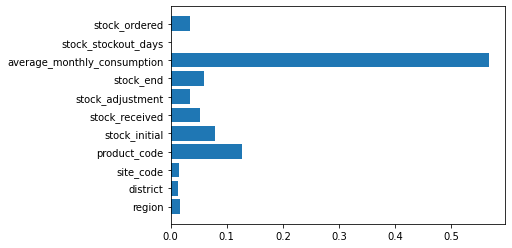

In [ ]:
plt.barh(features, xgb.feature_importances_)

## Challenging the solution using an ANN

In [ ]:
# Defining out Neural Network

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


In [ ]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile our neural network
model.compile(optimizer='adam', loss='mse')

epoch_hist = model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test), batch_size = 30, verbose = 2)

Epoch 1/100
835/835 - 1s - loss: 1083.8352 - val_loss: 542.6428
Epoch 2/100
835/835 - 1s - loss: 505.9739 - val_loss: 447.7672
Epoch 3/100
835/835 - 1s - loss: 457.2104 - val_loss: 415.9367
Epoch 4/100
835/835 - 1s - loss: 411.8098 - val_loss: 372.4290
Epoch 5/100
835/835 - 1s - loss: 357.8718 - val_loss: 327.1159
Epoch 6/100
835/835 - 1s - loss: 277.4002 - val_loss: 233.6104
Epoch 7/100
835/835 - 1s - loss: 184.7707 - val_loss: 138.6380
Epoch 8/100
835/835 - 1s - loss: 94.9492 - val_loss: 60.0821
Epoch 9/100
835/835 - 1s - loss: 30.2928 - val_loss: 17.5032
Epoch 10/100
835/835 - 1s - loss: 6.3251 - val_loss: 6.7671
Epoch 11/100
835/835 - 1s - loss: 3.9367 - val_loss: 4.9615
Epoch 12/100
835/835 - 1s - loss: 2.1232 - val_loss: 3.2368
Epoch 13/100
835/835 - 1s - loss: 4.0355 - val_loss: 5.6362
Epoch 14/100
835/835 - 1s - loss: 3.0198 - val_loss: 3.8323
Epoch 15/100
835/835 - 1s - loss: 1.2045 - val_loss: 2.0060
Epoch 16/100
835/835 - 1s - loss: 1.3065 - val_loss: 2.0335
Epoch 17/100
835

## Validation and Test Plot

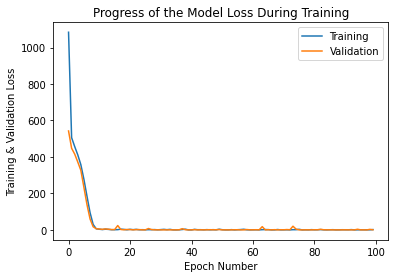

In [ ]:
plt.plot(epoch_hist.history['loss'], label = 'Training')
plt.plot(epoch_hist.history['val_loss'], label='Validation')
plt.title("Progress of the Model Loss During Training")
plt.ylabel("Training & Validation Loss")
plt.xlabel("Epoch Number")
plt.legend()
# There's flactuation in the error (loss func).

In [ ]:
# Using our ANN to predict
from sklearn.metrics import r2_score

y_pred_ann = model.predict(X_test)

r2_score(y_test, y_pred_ann)


0.9994527698982623

In [ ]:
# Evaluate the model on the validation set.
model.evaluate(X_test, y_test)

336/336 [==============================] - 0s 659us/step - loss: 0.8480


0.8480464816093445